In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')



In [2]:
#Reading the data
winequal=pd.read_csv('winequality-red.csv')

# Finding insights from the dataset or what the dataset consist of

In [3]:
winequal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
winequal.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
#Finding the number of rows and columns present in the dataset 
winequal.shape

(1599, 12)

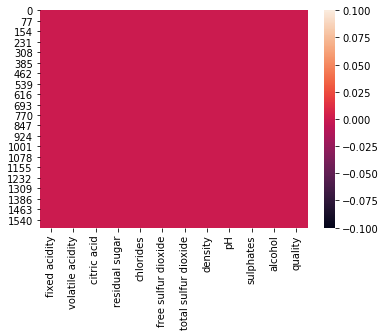

In [6]:
#looking for null values
sns.heatmap(winequal.isnull())

In [7]:
winequal.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

"We can say that there donot exits any Nan value or missing value"

# Bivariate Analysis

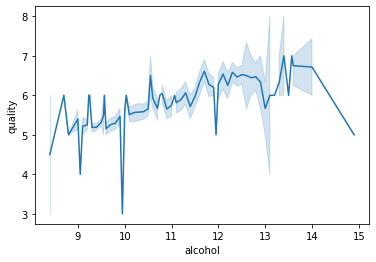

In [8]:
sns.lineplot(winequal['alcohol'],winequal['quality'])

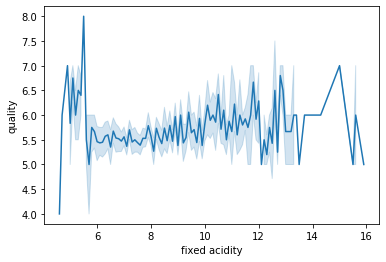

In [9]:
sns.lineplot(winequal['fixed acidity'],winequal['quality'])  

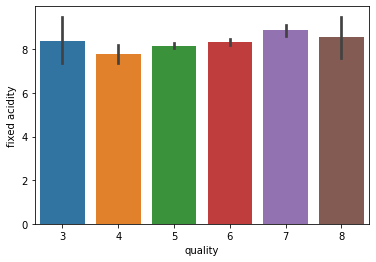

In [10]:
sns.barplot(x='quality', y= 'fixed acidity', data=winequal)

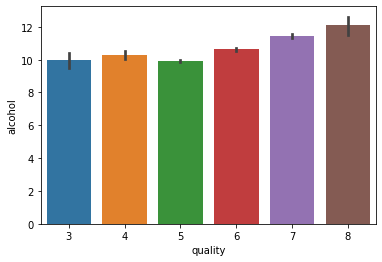

In [11]:
sns.barplot(x='quality', y='alcohol', data= winequal)

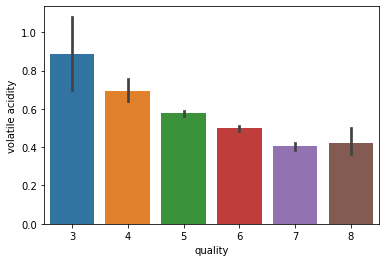

In [12]:
sns.barplot(x='quality', y='volatile acidity', data= winequal)

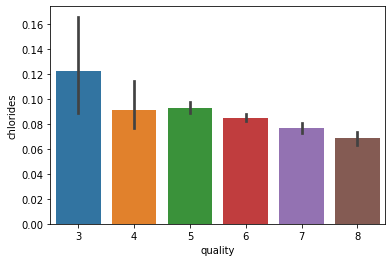

In [13]:
sns.barplot(x='quality', y='chlorides', data= winequal)

# Univariate Analysis

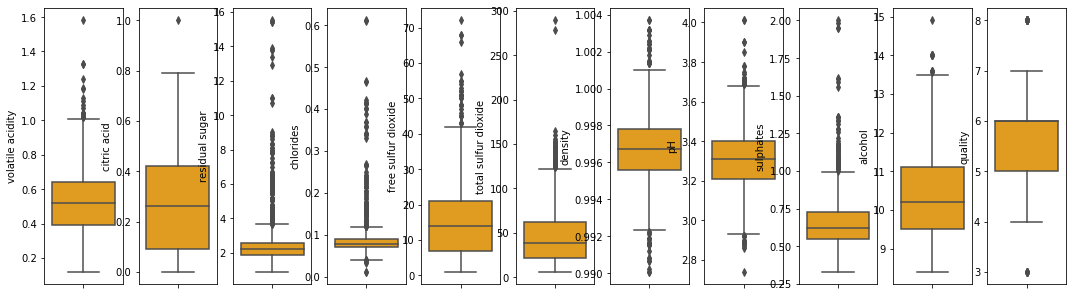

In [14]:
collist=winequal.columns.values
ncol=12
nrows=10
plt.figure(figsize=(20,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(winequal[collist[i]],color='orange',orient='v')

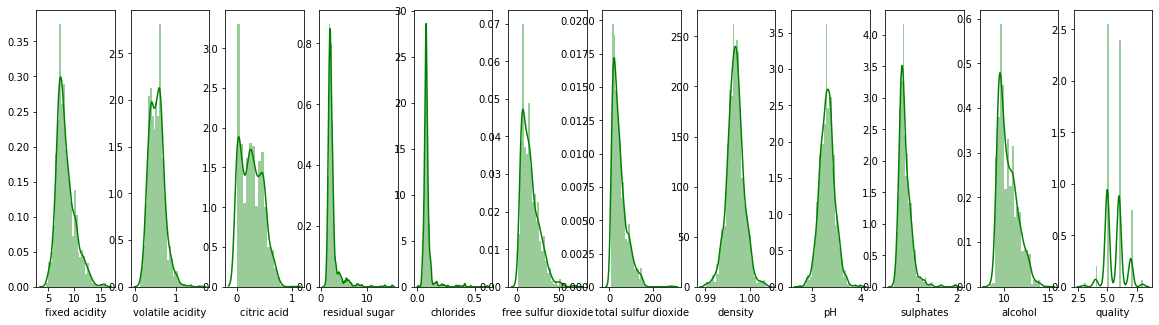

In [15]:
#checking Skewness
plt.figure(figsize=(20,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(winequal[collist[i]],color='green')

In [16]:
winequal.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [17]:
#there is skewness in the dataset, and we can say that there only exits positive skewness in the dataset

In [18]:
#treating skewed data
for i in range(0,len(collist)):
    if winequal.skew().loc[collist[i]]>0.55:
        winequal[collist[i]]=np.log1p(winequal[collist[i]])


In [19]:
#rechecking wether the skewness is resolved or not
winequal.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                 0.217802
dtype: float64

In [20]:
#Classifying the quality column as Good[for the quality rated between 6.5-8],Bad[for the quality rated between 2- 5],Average[for the quality rated between 5-6.5] 
bins = (2,6.5,8)
classified_as = ['Bad','Good']
winequal['quality']=pd.cut(winequal['quality'],bins= bins, labels = classified_as)

In [21]:
winequal['quality'].value_counts()

Bad     1382
Good     217
Name: quality, dtype: int64

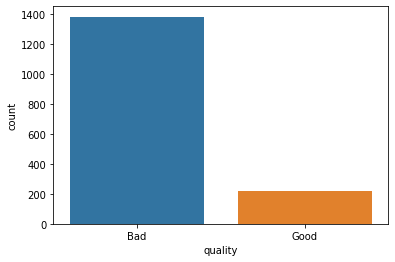

In [22]:
sns.countplot(winequal['quality'],data=winequal)

# STATISTICAL ANALYSIS

In [23]:
winequal.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,2.215842,0.417173,0.270976,1.218131,0.083038,2.639013,3.634750,0.996747,3.311113,0.501073,2.431458
std,0.178100,0.114926,0.194801,0.269969,0.038991,0.623790,0.682575,0.001887,0.154386,0.093731,0.090434
min,1.722767,0.113329,0.000000,0.641854,0.011929,0.693147,1.945910,0.990070,2.740000,0.285179,2.240710
25%,2.091864,0.329304,0.090000,1.064711,0.067659,2.079442,3.135494,0.995600,3.210000,0.438255,2.351375
50%,2.186051,0.418710,0.260000,1.163151,0.076035,2.708050,3.663562,0.996750,3.310000,0.482426,2.415914
75%,2.322388,0.494696,0.420000,1.280934,0.086178,3.091042,4.143135,0.997835,3.400000,0.548121,2.493205
max,2.827314,0.947789,1.000000,2.803360,0.476855,4.290459,5.669881,1.003690,4.010000,1.098612,2.766319


In [24]:
winequal.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.261021,0.668625,0.159498,0.120359,-0.178267,-0.114024,0.674368,-0.704262,0.191323,-0.089979
volatile acidity,-0.261021,1.000000,-0.564399,0.024171,0.072641,0.020740,0.084123,0.029969,0.233642,-0.282908,-0.213740
citric acid,0.668625,-0.564399,1.000000,0.168038,0.201936,-0.087838,-0.002553,0.364947,-0.541904,0.324348,0.109106
residual sugar,0.159498,0.024171,0.168038,1.000000,0.055852,0.100081,0.153561,0.405800,-0.091654,0.015572,0.075123
chlorides,0.120359,0.072641,0.201936,0.055852,1.000000,-0.005570,0.062192,0.219430,-0.269238,0.338225,-0.236040
free sulfur dioxide,-0.178267,0.020740,-0.087838,0.100081,-0.005570,1.000000,0.784256,-0.039532,0.095520,0.055347,-0.083237
total sulfur dioxide,-0.114024,0.084123,-0.002553,0.153561,0.062192,0.784256,1.000000,0.104534,-0.016021,0.059263,-0.237302
density,0.674368,0.029969,0.364947,0.405800,0.219430,-0.039532,0.104534,1.000000,-0.341699,0.157096,-0.491437
pH,-0.704262,0.233642,-0.541904,-0.091654,-0.269238,0.095520,-0.016021,-0.341699,1.000000,-0.177952,0.206157
sulphates,0.191323,-0.282908,0.324348,0.015572,0.338225,0.055347,0.059263,0.157096,-0.177952,1.000000,0.115170


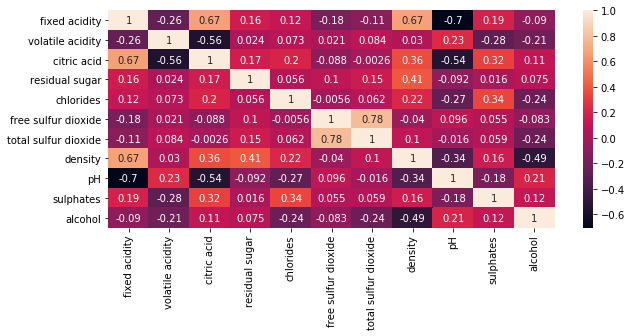

In [25]:
plt.figure(figsize=(10,4))
sns.heatmap(winequal.corr(),annot=True)

# Changing the categorical column 'values' to numeric 'values' using 'LABEL ENCODER'

In [26]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb.fit(winequal['quality'])
lb.classes_

array(['Bad', 'Good'], dtype=object)

In [27]:
winequal['quality']=lb.fit_transform(winequal['quality'])

In [28]:
winequal['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32

# Removing Outliers and skewness from the dataset

In [29]:
#removing outliers using zscore

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(winequal))
z

array([[0.49206951, 0.98751431, 1.39147228, ..., 0.60176716, 0.99166574,
        0.39625599],
       [0.23078609, 1.86351245, 1.39147228, ..., 0.18912335, 0.57421133,
        0.39625599],
       [0.23078609, 1.28941633, 1.18607043, ..., 0.00317263, 0.57421133,
        0.39625599],
       ...,
       [1.28039794, 0.04406793, 0.72391627, ..., 0.6247813 , 0.59120544,
        0.39625599],
       [1.59690876, 0.70125933, 0.77526673, ..., 0.37801568, 0.1719405 ,
        0.39625599],
       [1.51609325, 1.28074974, 1.02199944, ..., 0.06131178, 0.59120544,
        0.39625599]])

In [31]:
threshold=3

In [32]:
print(np.where(z>3))

(array([  13,   17,   17,   19,   33,   42,   43,   45,   81,   81,   83,
         86,   88,   91,   92,   95,  106,  106,  126,  127,  142,  144,
        147,  151,  151,  151,  151,  163,  164,  169,  169,  181,  226,
        226,  240,  243,  244,  258,  258,  274,  281,  291,  324,  325,
        339,  396,  400,  413,  415,  442,  442,  451,  467,  480,  480,
        494,  530,  535,  554,  554,  555,  555,  557,  557,  566,  567,
        568,  588,  595,  608,  614,  639,  649,  652,  652,  652,  666,
        672,  690,  692,  695,  723,  730,  754,  773,  776,  777,  821,
        836,  837,  889,  889,  911,  917,  923, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1081, 1111, 1114, 1165, 1186, 1235, 1244,
       1260, 1269, 1269, 1270, 1270, 1299, 1300, 1312, 1316, 1319, 1319,
       1321, 1370, 1372, 1374, 1434, 1434, 1435, 1435, 1474, 1474, 1476,
       1476, 1558, 1558, 1570, 1574, 1589], dtype=int64), array([ 9,  4,  9,  4,  3,  4,  9,  8,  4,  9,  4,  9,  9,  9,  9

In [33]:
z[13][9]

4.684371559356448

In [34]:
winequal_new=winequal[(z<3).all(axis=1)]

In [35]:
#checking the skewnes after removing the outliers
winequal_new.skew()

fixed acidity           0.464932
volatile acidity        0.149449
citric acid             0.299542
residual sugar          1.489031
chlorides               1.851547
free sulfur dioxide    -0.077323
total sulfur dioxide   -0.040725
density                 0.066459
pH                      0.094822
sulphates               0.740707
alcohol                 0.596417
quality                 2.127843
dtype: float64

In [36]:
#the skewness is still presnet in the dataset

In [37]:
#removing skewness using np.sqrt
#treating skewed data
collist=winequal_new.columns.values
for i in range(0,len(collist)):
    if winequal_new.skew().loc[collist[i]]>0.55:
        winequal_new[collist[i]]=np.sqrt(winequal_new[collist[i]])


In [38]:
winequal_new.skew()

fixed acidity           0.464932
volatile acidity        0.149449
citric acid             0.299542
residual sugar          1.177426
chlorides               1.079254
free sulfur dioxide    -0.077323
total sulfur dioxide   -0.040725
density                 0.066459
pH                      0.094822
sulphates               0.514468
alcohol                 0.565894
quality                 2.127843
dtype: float64

In [39]:
winequal_new.shape

(1487, 12)

In [40]:
winequal.shape

(1599, 12)

In [41]:
#after removing the outliers we are left with only 1487 rows

In [42]:
winequal=winequal_new

# Splitting The data into training and testing sets

In [43]:
x=winequal.iloc[:,0:-1]

In [44]:
x.shape

(1487, 11)

In [45]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.128232,0.530628,0.00,1.031848,0.270648,2.484907,3.555348,0.9978,3.51,0.666848,1.530296
1,2.174752,0.631272,0.00,1.131783,0.305762,3.258097,4.219508,0.9968,3.20,0.720273,1.542578
2,2.174752,0.565314,0.04,1.092668,0.296666,2.772589,4.007333,0.9970,3.26,0.707655,1.542578
3,2.501436,0.246860,0.56,1.031848,0.268925,2.890372,4.110874,0.9980,3.16,0.676332,1.542578
4,2.128232,0.530628,0.00,1.031848,0.270648,2.484907,3.555348,0.9978,3.51,0.666848,1.530296


In [46]:
y=winequal.iloc[:,-1]

In [47]:
y.shape

(1487,)

In [48]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: quality, dtype: float64

In [49]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)


In [50]:
x=df_x
print(x)

[[-0.51504962  1.01938359 -1.38387671 ...  1.37086166 -0.61571513
  -1.03143597]
 [-0.24529552  1.91932354 -1.38387671 ... -0.807668    0.35450578
  -0.58977716]
 [-0.24529552  1.32953686 -1.17574759 ... -0.3860171   0.12534912
  -0.58977716]
 ...
 [-1.32893528 -0.04039271 -0.70745706 ...  0.7383853   0.85938239
   0.62500191]
 [-1.65570722  0.72530501 -0.75948934 ...  1.79251256  0.57576323
  -0.16748396]
 [-1.57227172 -1.31087413  1.06164048 ...  0.52755985  0.20264704
   0.62500191]]


In [59]:
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [60]:
#Finding the best random state

In [61]:

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
        
        
    
    
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate)



Accuracy SCORE is equal to : 0.8829174664107485 at random state 42
Accuracy SCORE is equal to : 0.8656429942418427 at random state 43
Accuracy SCORE is equal to : 0.8944337811900192 at random state 44
Accuracy SCORE is equal to : 0.8637236084452975 at random state 45
Accuracy SCORE is equal to : 0.9059500959692899 at random state 46
Accuracy SCORE is equal to : 0.8848368522072937 at random state 47
Accuracy SCORE is equal to : 0.8905950095969289 at random state 48
Accuracy SCORE is equal to : 0.8925143953934741 at random state 49
Accuracy SCORE is equal to : 0.8982725527831094 at random state 50
Accuracy SCORE is equal to : 0.8771593090211133 at random state 51
Accuracy SCORE is equal to : 0.8848368522072937 at random state 52
Accuracy SCORE is equal to : 0.8809980806142035 at random state 53
Accuracy SCORE is equal to : 0.8618042226487524 at random state 54
Accuracy SCORE is equal to : 0.8886756238003839 at random state 55
Accuracy SCORE is equal to : 0.9001919385796545 at random stat

In [62]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=70)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(966, 11) (521, 11) (966,) (521,)


Testing the Algorithms and finding the the best parameters using Grid Search cv

In [63]:
#best parameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
lrg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'penalty': 'l2'}

In [64]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'C': 1, 'kernel': 'rbf'}

In [65]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'n_neighbors': 10}

In [66]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'gini'}



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY_SCORE = 0.9136276391554703


CROSS_VAL_SCORE = 0.8776301469254489


ROC_AUC_SCORE = 0.7277927542902229


 
 Classification Report 
                precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       454
         1.0       0.76      0.48      0.59        67

    accuracy                           0.91       521
   macro avg       0.84      0.73      0.77       521
weighted avg       0.91      0.91      0.90       521



[[444  10]
 [ 35  32]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_featu

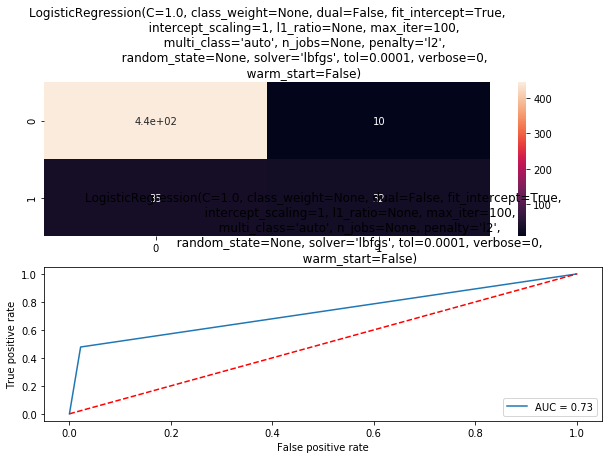

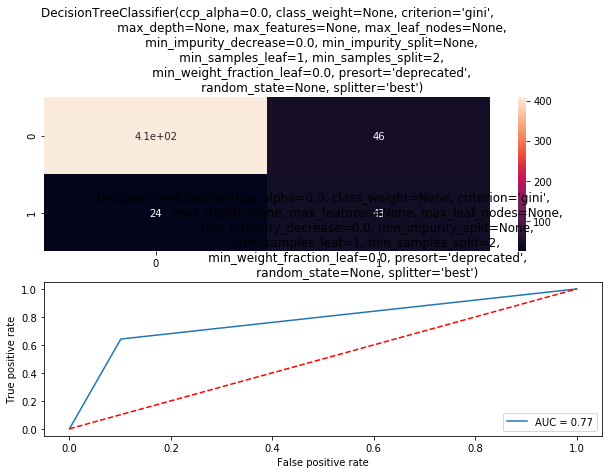

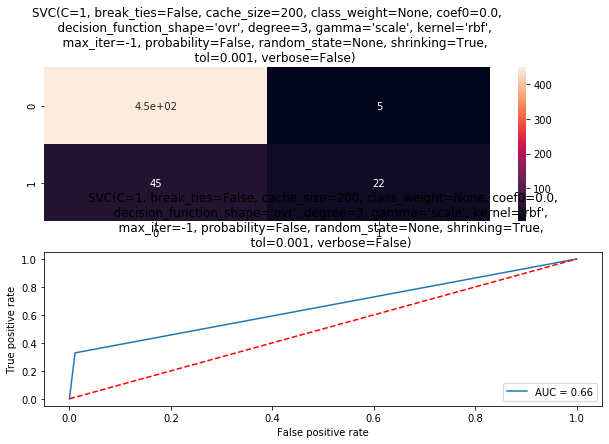

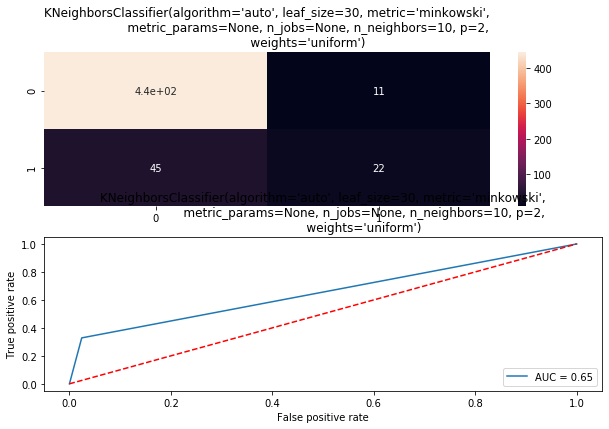

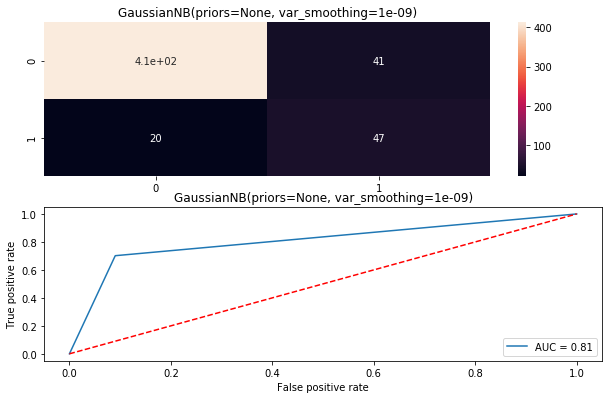

In [67]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),DecisionTreeClassifier(criterion='gini'),SVC(C=1,kernel='rbf'),KNeighborsClassifier(n_neighbors=10),GaussianNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(models,x,y,cv=10, scoring='accuracy').mean()
    print("CROSS_VAL_SCORE =",cv_score)
    cvs.append(cv_score*100)
    print("\n")
    false_positive_rate, true_positive_rate,  thresholds=roc_curve(y_test,prediction)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_SCORE =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print(" \n Classification Report \n ",classification_report(y_test,prediction))
    print("\n")
    cm=confusion_matrix(y_test,prediction)
    print(cm)
    print("\n") 
    plt.figure(figsize=(10,30))
    plt.subplot(911)
    plt.title(models)
    print(sns.heatmap(cm,annot=True))   
    plt.subplot(912)
    plt.title(models)      
    plt.plot(false_positive_rate, true_positive_rate, label= "AUC = %0.2f" % roc_auc)
    plt.plot([0,1],[0,1],'r--') 
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n \n \n")
          

    

In [68]:
outcome=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier','GaussianNB'],'Accuracy_Score':[0.91,0.865,0.904,0.892,0.88],'Cross_Val_Sore':[0.877,0.827,0.883,0.876,0.8467],'Roc_Auc_Score':[0.727,0.770,0.658,0.652,0.8056]})
outcome

,Model,Accuracy_Score,Cross_Val_Sore,Roc_Auc_Score
0,LogisticRegression,0.910,0.8770,0.7270
1,DecisionTreeClassifier,0.865,0.8270,0.7700
2,SVC,0.904,0.8830,0.6580
3,KNeighborsClassifier,0.892,0.8760,0.6520
4,GaussianNB,0.880,0.8467,0.8056


In [ ]:
#Hence it is observed that lg is giving a good result, therefore finalizing it

In [69]:
lg=LogisticRegression(penalty='l2')
lg.fit(x_train,y_train)
prediction=lg.predict(x_test)
acc_score=accuracy_score(prediction,y_test)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(svc,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.9136276391554703
The Cross Val Score = 0.883661345909668


In [70]:
from sklearn.externals import joblib
joblib.dump(lg,"lg_Wine_quality.pkl")

['lg_Wine_quality.pkl']